# Prediction of house prices using Decision Tree and Random Forest Regressors

The following notebook uses an array of house features to create a model to predict the house price.  


## Imports

In [15]:
#display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

#machine learning libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#data visulasation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#needed for more than on of the above
import pandas as pd

In [2]:
#setup
file_path = 'train_data.csv'

In [4]:
def selectiveColumnsTraining():
#target object
    home_data = pd.read_csv(file_path, index_col='Id')
    y = home_data.SalePrice

    features = ['OpenPorchSF', 'LowQualFinSF', 'GrLivArea', 'LotArea', 'YearBuilt',
           'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'FullBath',
           'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces','MiscVal','OpenPorchSF','PoolArea','WoodDeckSF']

    #optimum arrangement found - including na columns in test
    #features = ['OpenPorchSF','GarageCars','BsmtFullBath','LowQualFinSF','GrLivArea','TotalBsmtSF','BsmtFinSF2','BsmtFinSF1','LotArea',
    #            'YearBuilt', 'OverallQual', 'OverallCond', '1stFlrSF', 
    #            '2ndFlrSF','FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd','Fireplaces']
    
    #cols_with_missing = [col for col in X_train.columns
#                      if X_train[col].isnull().any()] 

    X = home_data[features]

    # Split into validation and training data
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
    return train_X, val_X, train_y, val_y;

def selectiveColumnsTesting():
    home_data = pd.read_csv(file_path, index_col='Id')
    y = home_data.SalePrice

    features = ['OpenPorchSF', 'LowQualFinSF', 'GrLivArea', 'LotArea', 'YearBuilt',
           'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'FullBath',
           'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces','MiscVal','OpenPorchSF','PoolArea','WoodDeckSF']

    #optimum arrangement found - including na columns in test
    #features = ['OpenPorchSF','GarageCars','BsmtFullBath','LowQualFinSF','GrLivArea','TotalBsmtSF','BsmtFinSF2','BsmtFinSF1','LotArea',
    #            'YearBuilt', 'OverallQual', 'OverallCond', '1stFlrSF', 
    #            '2ndFlrSF','FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd','Fireplaces']

    X = home_data[features]
    return X, y, features;

## Decision Tree Regressor Model

First we will explore the accuracy of the decision tree model

In [5]:
def DTRmodel(leaf_node_limit=None):
    train_X, val_X, train_y, val_y = selectiveColumnsTraining()
    DTmodel = DecisionTreeRegressor(max_leaf_nodes=leaf_node_limit, random_state=1)
    DTmodel.fit(train_X, train_y)
    val_predictions = DTmodel.predict(val_X)
    val_mae = mean_absolute_error(val_predictions, val_y)
    return val_mae
DTRmodel(leaf_node_limit=150)


21877.03782201727

Text(0, 0.5, 'MAE')

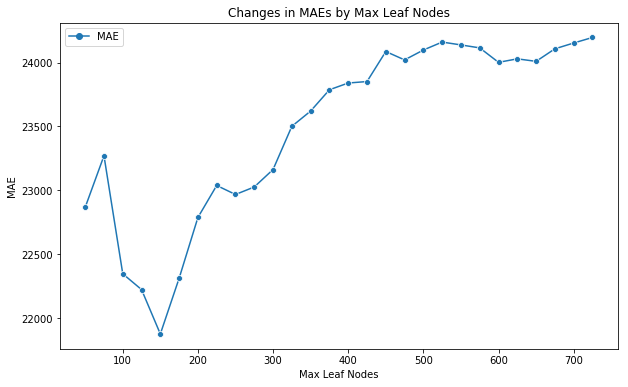

In [8]:
#which number of leaf nodes creates the best prediction?
leaf_nodes= [(limit, DTRmodel(leaf_node_limit=limit)) for limit in range (50,750,25)]
leaves=pd.DataFrame(leaf_nodes, columns = ["Max Leaf Nodes","MAE"]).set_index("Max Leaf Nodes")
plt.figure(figsize=(10,6))
sns.lineplot(data=leaves, markers='o')
plt.title('Changes in MAEs by Max Leaf Nodes')
plt.ylabel("MAE")

From this data, we can see that 150 is a "sweet spot" where the MAE is locally minimised

## Random forest model

In [6]:
# Random Forest Regressor Model
def RFRmodel(train_mode=selectiveColumnsTraining(), trees=10, leaf_limit=None):
    train_X, val_X, train_y, val_y = train_mode
    rf_model = RandomForestRegressor(random_state=1, n_estimators=trees, max_leaf_nodes=leaf_limit)
    rf_model.fit(train_X, train_y)
    rf_val_predictions = rf_model.predict(val_X)
    rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)
    return rf_val_mae

## Output

In [10]:
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(DTRmodel()))
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(DTRmodel(leaf_node_limit=150)))
print("Validation MAE for Random Forest Model: {:,.0f}".format(RFRmodel()))

Validation MAE when not specifying max_leaf_nodes: 24,603
Validation MAE for best value of max_leaf_nodes: 21,877
Validation MAE for Random Forest Model: 18,716


## Using the model on test set

In [11]:
# To improve accuracy, a Random Forest model is trained on all training data
X, y, features= selectiveColumnsTesting()
rf_model_on_full_data = RandomForestRegressor(random_state=1)
rf_model_on_full_data.fit(X,y)

C:\Users\tofun\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [12]:
test_data_path = 'test_data.csv'
test_data = pd.read_csv(test_data_path)
test_X = test_data[features]

In [13]:
test_preds = rf_model_on_full_data.predict(test_X)
output = pd.DataFrame({'Id': test_data.Id,
                      'SalePrice': test_preds})
output.head()

,Id,SalePrice
0,1461,120220.0
1,1462,165240.0
2,1463,189130.0
3,1464,188800.0
4,1465,192195.6


This model is good, as according to Kaggle, the mean absolute error of the predicted house prices made from the test data is 19050.25253.

However, as seen in In[2] a lot of data from the file is not used, so there is much room for improvement 


## Improving the Random Forest Model

How many trees do we use in the random forest model? right now we use the default value of RandomForestRegressor (which is 10), but what would value would optimise the MAE is we did?

In [40]:
#which number trees creates the best prediction?
def plotTreesvsMAE(start,stop,step=1, train_mode=selectiveColumnsTraining(),train_mode2=None, labels=("method 1 MAE","method 2 MAE")):
    tree_list =[]
    if train_mode2==None:
        tree_list= [(tree_No, RFRmodel(trees=tree_No, train_mode=train_mode,)) for tree_No in range (start,stop,step)]
        tree_df=pd.DataFrame(tree_list, columns = ["Number of trees","MAE"]).set_index("Number of trees")

    else:
        tree_list= [(tree_No, RFRmodel(trees=tree_No, train_mode=train_mode), RFRmodel(trees=tree_No, train_mode=train_mode2)) for tree_No in range (start,stop,step)]
        tree_df=pd.DataFrame(tree_list, columns = ["Number of trees",labels[0], labels[1]]).set_index("Number of trees")
    plt.figure(figsize=(12,8))
    sns.lineplot(data=tree_df, markers=True)
    plt.title('Changes in MAEs by number of estimators (trees)')
    plt.ylabel("MAE")
    

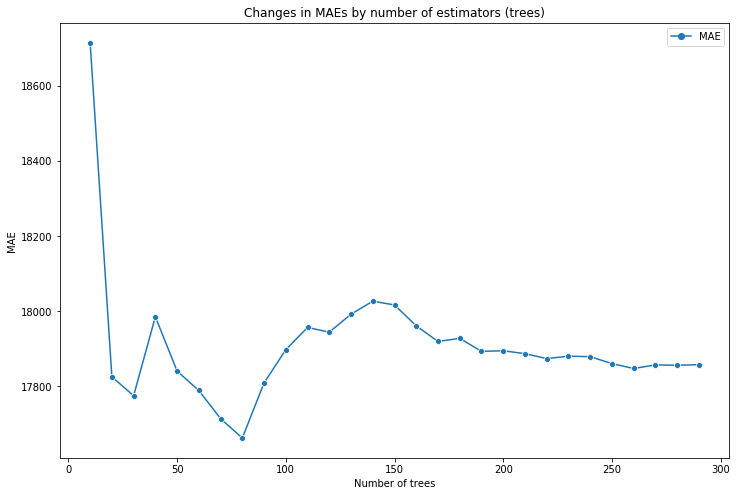

In [25]:
plotTreesvsMAE(10,300,step=10)

From this data, we can see that 80 is a "sweet spot" where the MAE is locally minimised

Now that we have a broad idea of where the minimum is, we, will test values around the area to see if the value can get any lower

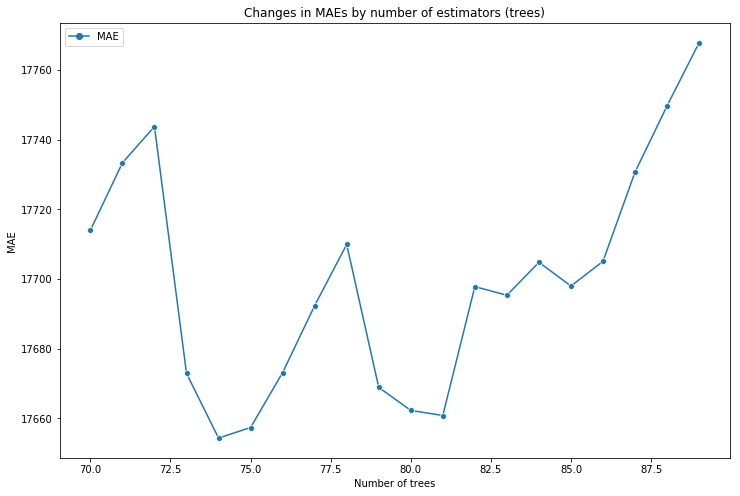

In [15]:
plotTreesvsMAE(70,90)

Further analysis shows that there is another local minimum at 74, so we shall use this number of trees in our RFR models from now on

In [16]:
print("Validation MAE for Random Forest Model: {:,.0f}".format(RFRmodel()))
print("Validation MAE for Random Forest Model with optimum number of trees: {:,.0f}".format(RFRmodel(trees=74)))

Validation MAE for Random Forest Model: 18,716
Validation MAE for Random Forest Model with optimum number of trees: 17,654


## Dealing with the missing values - Imutptation 

currently, we carefully select what columns in the csv's are used for according supposed useful and whether they is any data missing. In other words we will automatically not consider any coulmns with missing values, making us miss out on a lot of meaningful data. To improve on this, we will use a techinque called imputation

In [76]:
def ImputedColsTraining():
    X_full = pd.read_csv('train_data.csv', index_col='Id')
    # Remove rows with missing target, separate target from predictors
    X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
    y = X_full.SalePrice
    X_full.drop(['SalePrice'], axis=1, inplace=True)

    # we'll use only numerical predictors
    X = X_full.select_dtypes(exclude=['object'])

    # Break off validation set from training data
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                          random_state=1)
    #imputation
    my_imputer = SimpleImputer(strategy='median')
    imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
    imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

    # imputation removed column names; put them back
    imputed_X_train.columns = X_train.columns
    imputed_X_valid.columns = X_valid.columns
    
    #imputed_X_train.index = X_train.index
    #imputed_X_valid.index = X_valid.index
    return imputed_X_train, imputed_X_valid, y_train, y_valid;

In [77]:
print("Validation MAE for Random Forest Model with imputation: {:,.0f}".format(RFRmodel(trees=74, train_mode=ImputedColsTraining())))

Validation MAE for Random Forest Model with imputation: 17,095


but does changing this change mode has and affect on the number of trees needed? let's investigate

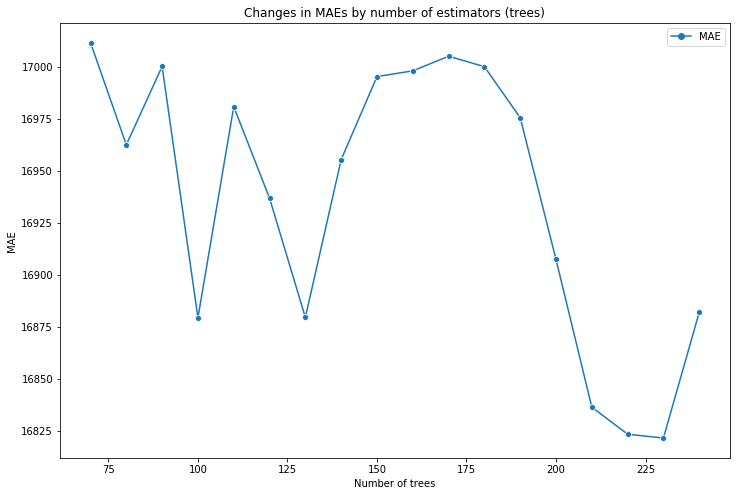

In [26]:
plotTreesvsMAE(70,250,step=10, train_mode=ImputedColsTraining())

interestignly, it appears that with imputed data, a higher number of trees tend to yield better results, with a local minimum around 230. Zooming in...

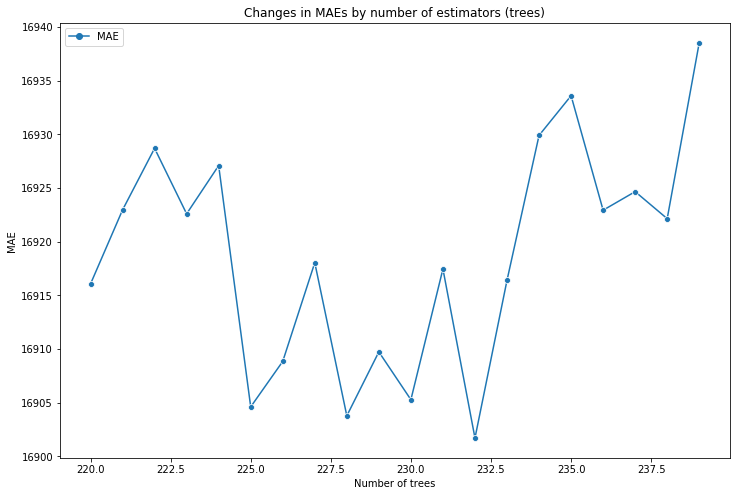

In [30]:
plotTreesvsMAE(220,240,train_mode=ImputedColsTraining())

we see the minimum is actually at 232

In [35]:
print("Validation MAE for Random Forest Model with imputation: {:,.0f}".format(RFRmodel(trees=232, train_mode=ImputedColsTraining())))

Validation MAE for Random Forest Model with imputation: 16,817


when using the new model on the test set and sending the submissions file into kaggle, the MAE was 16991.14489

## Adding Catergorical variables

Currently our training data includes drops catergorical variables, but these columns can be very helpful in identifying trends. In repsonse we will explore a number of ultising catergorical variables in our model


### Label Encoding
Label encoding will assign as number to each of the unique values in a catergorical column, but problems can arises when the validation data has different values to the test data in the column, so we mush first identify these columns and make sure not to label encode them.

In [17]:
def LabelEncodingTraining():
    X = pd.read_csv('train_data.csv', index_col='Id') 
    #X_test = pd.read_csv('../input/test.csv', index_col='Id')

    # Remove rows with missing target, separate target from predictors
    X.dropna(axis=0, subset=['SalePrice'], inplace=True)
    y = X.SalePrice
    X.drop(['SalePrice'], axis=1, inplace=True)

    # To keep things simple, we'll drop columns with missing values
    cols_with_missing = [col for col in X.columns if X[col].isnull().any()] 
    X.drop(cols_with_missing, axis=1, inplace=True)
    
   # X_test.drop(cols_with_missing, axis=1, inplace=True)

    # Break off validation set from training data
    X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                          train_size=0.8, test_size=0.2,
                                                          random_state=0)
    
    # All categorical columns
    object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

    # Columns that can be safely label encoded
    good_label_cols = [col for col in object_cols if 
                       set(X_train[col]) == set(X_valid[col])]
    # Problematic columns that will be dropped from the dataset
    bad_label_cols = list(set(object_cols)-set(good_label_cols))
    
    # Drop categorical columns that will not be encoded
    label_X_train = X_train.drop(bad_label_cols, axis=1)
    label_X_valid = X_valid.drop(bad_label_cols, axis=1)

    # Apply label encoder 
    label_encoder = LabelEncoder()
    for col in good_label_cols:
        label_X_train[col] = label_encoder.fit_transform(X_train[col])
        label_X_valid[col] = label_encoder.transform(X_valid[col])
#    X_cat =  X = X_full.select_dtypes(exclude=['int', 'float64'])
    return label_X_train, label_X_valid, y_train, y_valid;

In [21]:
print("Validation MAE for Random Forest Model with Label Encoding: {:,.0f}".format(RFRmodel(trees=232, train_mode=LabelEncodingTraining())))

Validation MAE for Random Forest Model with Label Encoding: 17,215


even though imputation hasn't been untilised yet, we can see the resukts are still better than the "plain" random forest model


### One-Hot encoding

Our next approcah to consider is to make a column for all unique values in a catergorical column and put a 1 that column for a row that has the celected categorical value in it.
However it would not be wise to ulitise this approach with a catorgical column that has a high cardinality, as it would make too many extra columns, so will only use the method with columns of a cardinality under 10

In [10]:
def OneHotEncodingTraining():
    X = pd.read_csv('train_data.csv', index_col='Id') 
    #X_test = pd.read_csv('../input/test.csv', index_col='Id')

    # Remove rows with missing target, separate target from predictors
    X.dropna(axis=0, subset=['SalePrice'], inplace=True)
    y = X.SalePrice
    X.drop(['SalePrice'], axis=1, inplace=True)

    # To keep things simple, we'll drop columns with missing values
    cols_with_missing = [col for col in X.columns if X[col].isnull().any()] 
    X.drop(cols_with_missing, axis=1, inplace=True)
    
   # X_test.drop(cols_with_missing, axis=1, inplace=True)

    # Break off validation set from training data
    X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                          train_size=0.8, test_size=0.2,
                                                          random_state=0)    
    # All categorical columns
    object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]
    
    # Columns that will be one-hot encoded
    low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]
    
    OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
    OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

    OH_cols_train.index = X_train.index
    OH_cols_valid.index = X_valid.index

    # Remove categorical columns (will replace with one-hot encoding)
    num_X_train = X_train.drop(object_cols, axis=1)
    num_X_valid = X_valid.drop(object_cols, axis=1)

    # Add one-hot encoded columns to numerical features
    OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
    OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)
    
    test_X_train = num_X_train+OH_cols_train
    test_X_valid = num_X_valid+OH_cols_valid
    
    return OH_X_train, OH_X_valid, y_train, y_valid;

In [11]:
print("Validation MAE for Random Forest Model with One-Hot Encoding: {:,.0f}".format(RFRmodel(trees=232, train_mode=OneHotEncodingTraining())))

Validation MAE for Random Forest Model with One-Hot Encoding: 16,978


we see one hot encoding has actually worked a bit better, but which will prevail once the number of trees is optimised?

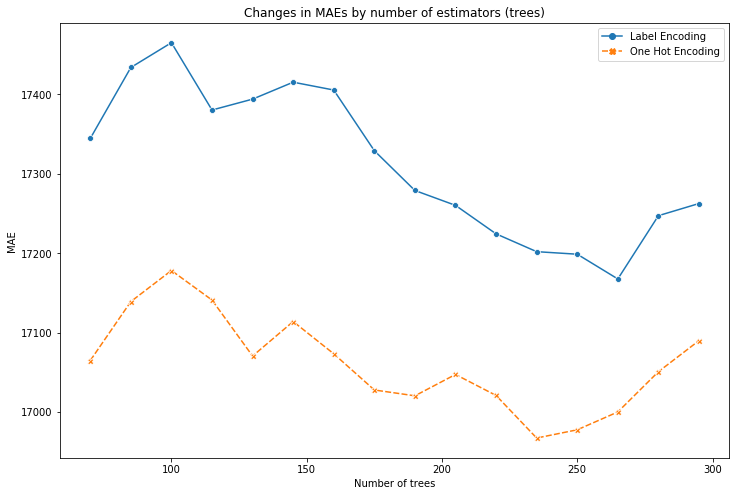

In [41]:
plotTreesvsMAE(70,300,15, train_mode=LabelEncodingTraining(),train_mode2=OneHotEncodingTraining(), labels=('Label Encoding','One Hot Encoding'))


interestingly, on its own, one-hot encoding triumphs over label encoding by far, zooming in (on One-Hot Encoding)...

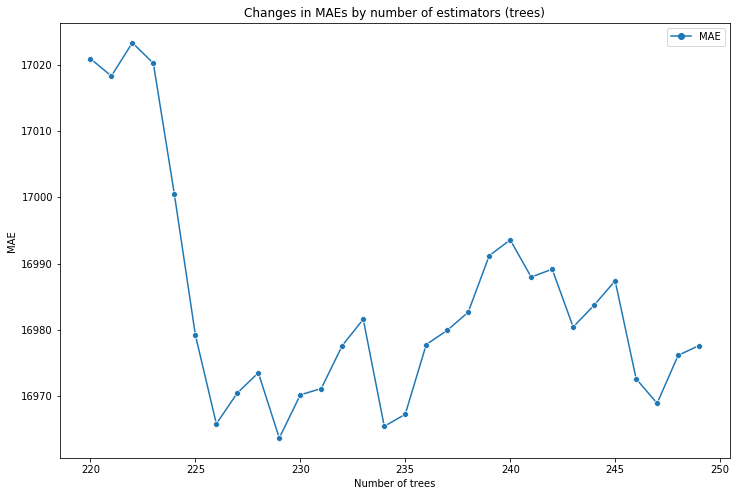

In [45]:
plotTreesvsMAE(220,250, train_mode=OneHotEncodingTraining())

we see that at 229 trees, one-hot encoding is optimised

In [53]:
print("Validation MAE for Random Forest Model with One-Hot Encoding - optimised trees: {:,.0f}".format(RFRmodel(trees=229, train_mode=OneHotEncodingTraining())))

Validation MAE for Random Forest Model with One-Hot Encoding -optimised trees: 16,964


interestingly, we see this value is still not as low as imputation or one-hot encoding by themselves, suggesting that the data is being overfitted

## Pipelining - combining methods

So what happens when we combine the last two techinques by one-hot coding the catergorical data and imputing the numerical missing values?

In [24]:
def pipelineTrainingAndmodel(trees):
    # Read the data
    X_full = pd.read_csv('train_data.csv', index_col='Id')
    X_test_full = pd.read_csv('test_data.csv', index_col='Id')

    # Remove rows with missing target, separate target from predictors
    X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
    y = X_full.SalePrice
    X_full.drop(['SalePrice'], axis=1, inplace=True)

    # Break off validation set from training data
    X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, 
                                                                    train_size=0.8, test_size=0.2,
                                                                    random_state=0)

    # "Cardinality" means the number of unique values in a column
    # Select categorical columns with relatively low cardinality (convenient but arbitrary)
    categorical_cols = [cname for cname in X_train_full.columns if
                        X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

    # Select numerical columns
    numerical_cols = [cname for cname in X_train_full.columns if 
                    X_train_full[cname].dtype in ['int64', 'float64']]

    # Keep selected columns only
    my_cols = categorical_cols + numerical_cols
    X_train = X_train_full[my_cols].copy()
    X_valid = X_valid_full[my_cols].copy()
    X_test = X_test_full[my_cols].copy()
    
    # Preprocessing for numerical data
    numerical_transformer = SimpleImputer(strategy='median') # Your code here

    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ]) 
    # Bundle preprocessing for numerical and categorical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Define model
    model = RandomForestRegressor(n_estimators=trees, random_state=0)
    
    # Bundle preprocessing and modeling code in a pipeline
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', model)
                                 ])

    # Preprocessing of training data, fit model 
    my_pipeline.fit(X_train, y_train)

    # Preprocessing of validation data, get predictions
    preds = my_pipeline.predict(X_valid)

    # Evaluate the model
    score = mean_absolute_error(y_valid, preds)
    return score
    #print('MAE:', score)


In [29]:
pipelineTrainingAndmodel(235)

17316.210769454967

Text(0, 0.5, 'MAE')

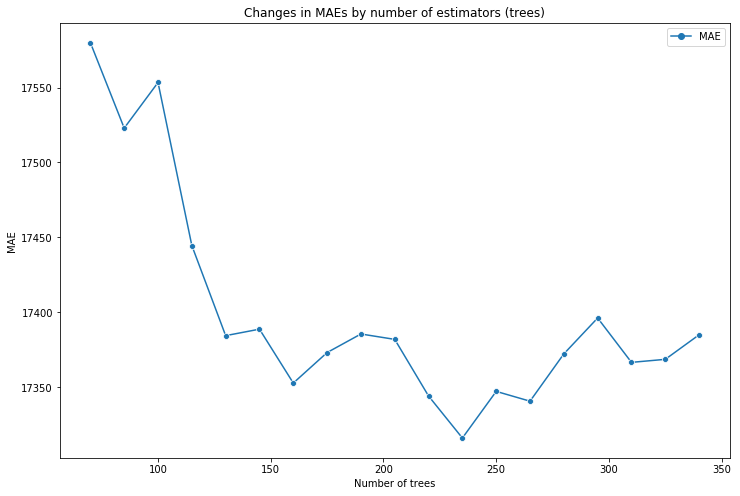

In [27]:
tree_list= [(tree_No, pipelineTrainingAndmodel(tree_No)) for tree_No in range (70,350,15)]
tree_df=pd.DataFrame(tree_list, columns = ["Number of trees","MAE"]).set_index("Number of trees")
plt.figure(figsize=(12,8))
sns.lineplot(data=tree_df, markers=True)
plt.title('Changes in MAEs by number of estimators (trees)')
plt.ylabel("MAE")

We can see that 235 is a sweet spot where the MAEs is minimised. zooming in...

Text(0, 0.5, 'MAE')

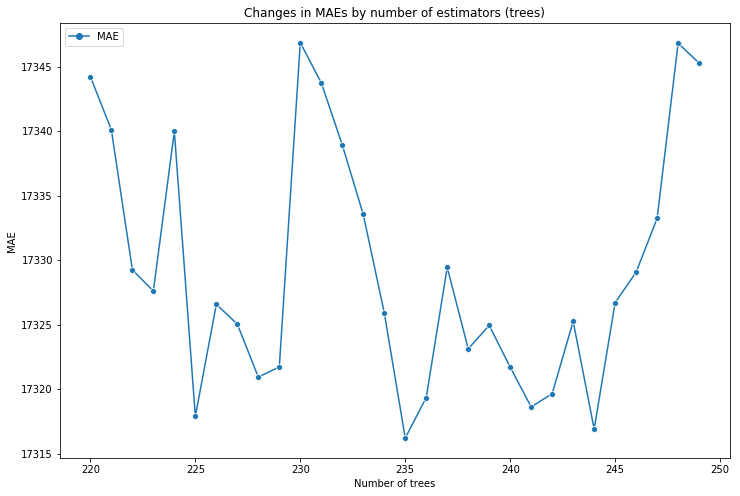

In [28]:
tree_list= [(tree_No, pipelineTrainingAndmodel(tree_No)) for tree_No in range (220,250)]
tree_df=pd.DataFrame(tree_list, columns = ["Number of trees","MAE"]).set_index("Number of trees")
plt.figure(figsize=(12,8))
sns.lineplot(data=tree_df, markers=True)
plt.title('Changes in MAEs by number of estimators (trees)')
plt.ylabel("MAE")

235 is indeed the number of trees that minises the MAE with this method. Interestingly, we see this value is still not as low as imputation or one-hot encoding by themselves, suggesting that the data is being overfitted. However when the whole dataset is used to train the model and a file of similar size is predicted the MAE plummets to 15999.95255, suggesting that the method is valid for a bigger dataset


## Cross-Validation
whilst we cannot gain a bigger dataset, we amy use other techinques, such as cross-validation to mesure the models performance better